# Author :  Bhanusri Sami

## Sparks Founation
### TASK2 -  Prediction using Unsupervised ML for Iris Dataset
### TASK6 -  Prediction using Decision Tree Algorithm

In [214]:
## pip install pyclustertend
##!pip install yellowbrick


In [215]:
### Importing all necesary libraries .
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,f1_score,recall_score,precision_score
##from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [216]:
## Reading the Data 

iris_df = pd.read_csv("Iris.CSV")

### Exploratory data analysis 

In [217]:
## Descibing the data 

iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [218]:
### Viewing the data 

iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [219]:
### Viewing the classes of the data

iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [220]:
### Checking for null Values in the data

iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [221]:
### Checking for the duplicate values 

iris_df.duplicated().sum()

0

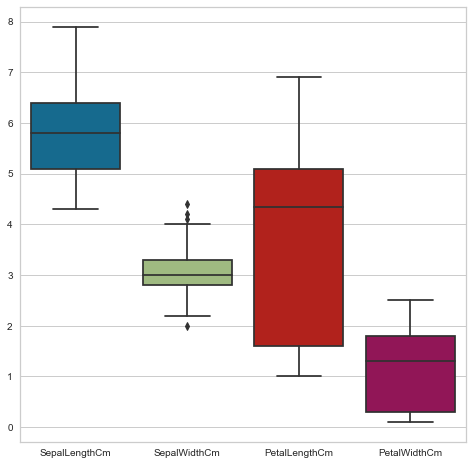

In [222]:
### Checking for the outliers using box plot

plt.figure(figsize=(8,8))
sns.boxplot(data=iris_df.drop(['Id','Species'],axis=1));

In [223]:
### Defining a function that returns a lower and upper bounds . 

def cal_bounds(listbound):
    q1, q3= np.percentile(listbound,[25,75])
    iqr = q3 - q1
    upper = q3+(1.5 * iqr)
    lower = q1-(1.5*iqr)
   ## print(lower,upper)
    return lower,upper 

In [224]:
### Replacing the outliers with inner bound and outer bound

lower,upper = cal_bounds(iris_df['SepalWidthCm'])
print(lower,upper)

iris_df.loc[iris_df['SepalWidthCm']>upper,'SepalWidthCm'] = upper
iris_df.loc[iris_df['SepalWidthCm']<lower,'SepalWidthCm'] = lower


2.05 4.05


In [225]:
### Dropping 'Id','Species' from Iris to extract Iris_df

X_Features = iris_df.drop(['Id','Species'],axis=1)


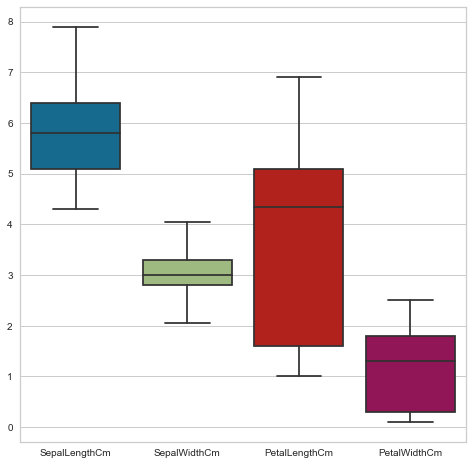

In [226]:
### Checking for the outliers using box plot

plt.figure(figsize=(8,8))
sns.boxplot(data=X_Features);

In [227]:
### Cheking for correlation between the columns of the data .

X_Features.corr()[ (X_Features.corr() > 0.8) | (X_Features.corr() < -0.8) ]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,NaN,0.871754,0.817954
SepalWidthCm,NaN,1.0,NaN,NaN
PetalLengthCm,0.871754,NaN,1.000000,0.962757
PetalWidthCm,0.817954,NaN,0.962757,1.000000


<Axes: >

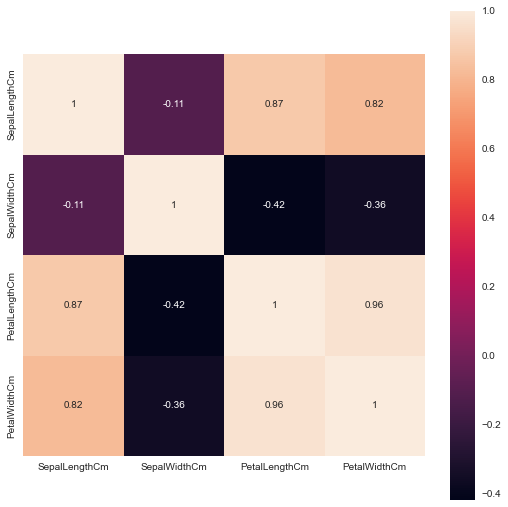

In [228]:
###Viewing the co-relation using HeatMap

f, ax = plt.subplots(figsize = (9,9))
sns.heatmap(X_Features.corr(), square=True, annot=True)

<Axes: xlabel='Outcome', ylabel='frequency'>

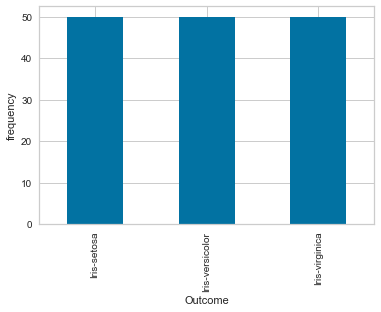

In [229]:
### Checking for the classimbalance .

iris_df['Species'].value_counts().plot(kind='bar',xlabel='Outcome', ylabel='frequency')

In [230]:
### Using Hopkins static to asses the cluster tendency .

hopkins(X_Features,50)

0.16608472148640868

### K-Means

In [231]:
### Viewing the shape of Features . 

X_Features.shape

(150, 4)

In [232]:
### Using the StandardScaler to scale the features  .

std_scaler = StandardScaler()
X_Features = std_scaler.fit_transform(X_Features)

In [233]:
### Viewing the shape of the features after scaling . 

X_Features.shape

(150, 4)

For n_clusters = 2 The average silhouette_score is : 0.5798857604435109
For n_clusters = 3 The average silhouette_score is : 0.4609853948682445
For n_clusters = 4 The average silhouette_score is : 0.4209094249343606
For n_clusters = 5 The average silhouette_score is : 0.3533216398352874


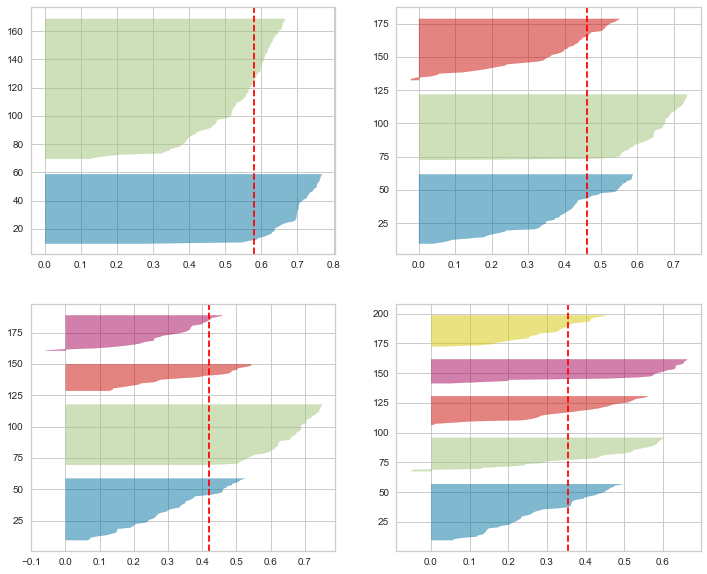

In [234]:
### Finding the optimum number of clusters using K-Means .

k = []
clusters = [2,3,4,5]
plt.figure(figsize=(12,10))
for i in  clusters:
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    label=kmeans.fit_predict(X_Features)
    k.append(kmeans.inertia_)
    
    ##Silhouette score is used to evaluate the quality of clusters created using clustering algorithms
    ##in terms of how well samples are clustered with other samples that are similar to each other.
    silhouette_avg = silhouette_score(X_Features, label)  
    print("For n_clusters =",i,"The average silhouette_score is :",silhouette_avg)
    
    ##Silhouette analysis done on the below plots to select an optimal value for n_clusters.
    ##Presence of clusters with below-average silhouette scores 
    ##Wide fluctuations in the size of the silhouette plots.
    ##The thickness of the silhouette plot representing each cluster also is a deciding point.
    plt.subplot(2,2,i-1)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(X_Features)

  


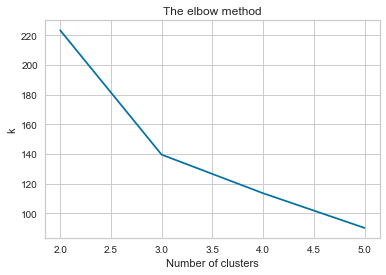

In [235]:
# Plotting the results onto a line graph, 
# To observe 'The elbow'

plt.plot(clusters, k)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('k') # Within cluster sum of squares
plt.show()

In [236]:
### Applying k-Means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_Features)

In [237]:
### Viewing the cluster .

y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [238]:
### Adding the clusters to the original dataset .

iris_df['cluster'] = y_kmeans

In [239]:
### Viewing how data is distributes among clusters .

iris_df.loc[:,['cluster','Species']].value_counts()

cluster  Species        
1        Iris-setosa        50
0        Iris-versicolor    39
2        Iris-virginica     36
0        Iris-virginica     14
2        Iris-versicolor    11
dtype: int64

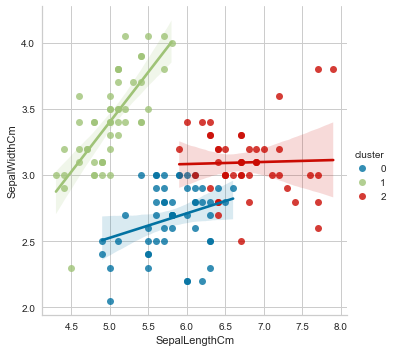

In [240]:
### Plotting the clusters of the dataset using SepalLengthCm,SepalWidthCm

sns.lmplot('SepalLengthCm','SepalWidthCm',data=iris_df,hue='cluster');

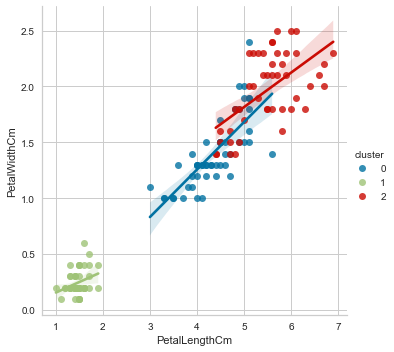

In [241]:
### Plotting the clusters of the dataset using PetalLengthCm,PetalWidthCm

sns.lmplot('PetalLengthCm','PetalWidthCm',data=iris_df,hue='cluster');

### Decision Tree Classifier 

In [242]:
#### Using Inverse transform because Decision Tree and Ensembles doe not need any normlization/scaling and encoding .

X_Features = std_scaler.inverse_transform(X_Features)
Y_target = iris_df['Species']

In [243]:
## splitting the data for train and test .

X_train , X_test, y_train, y_test = train_test_split(X_Features, Y_target, random_state = 10)

In [244]:
## Viewing the shape of the train and test data .

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [245]:
### Creating a Decisin Tree Model .

DT_model = DecisionTreeClassifier(random_state=1234)

In [246]:
### Training the Model 

DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1234)

In [247]:
### Viewing the text representaion using methods from tree librarry .

text_representation = tree.export_text(DT_model)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



In [248]:
### Defining the list of feature names and class names .

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

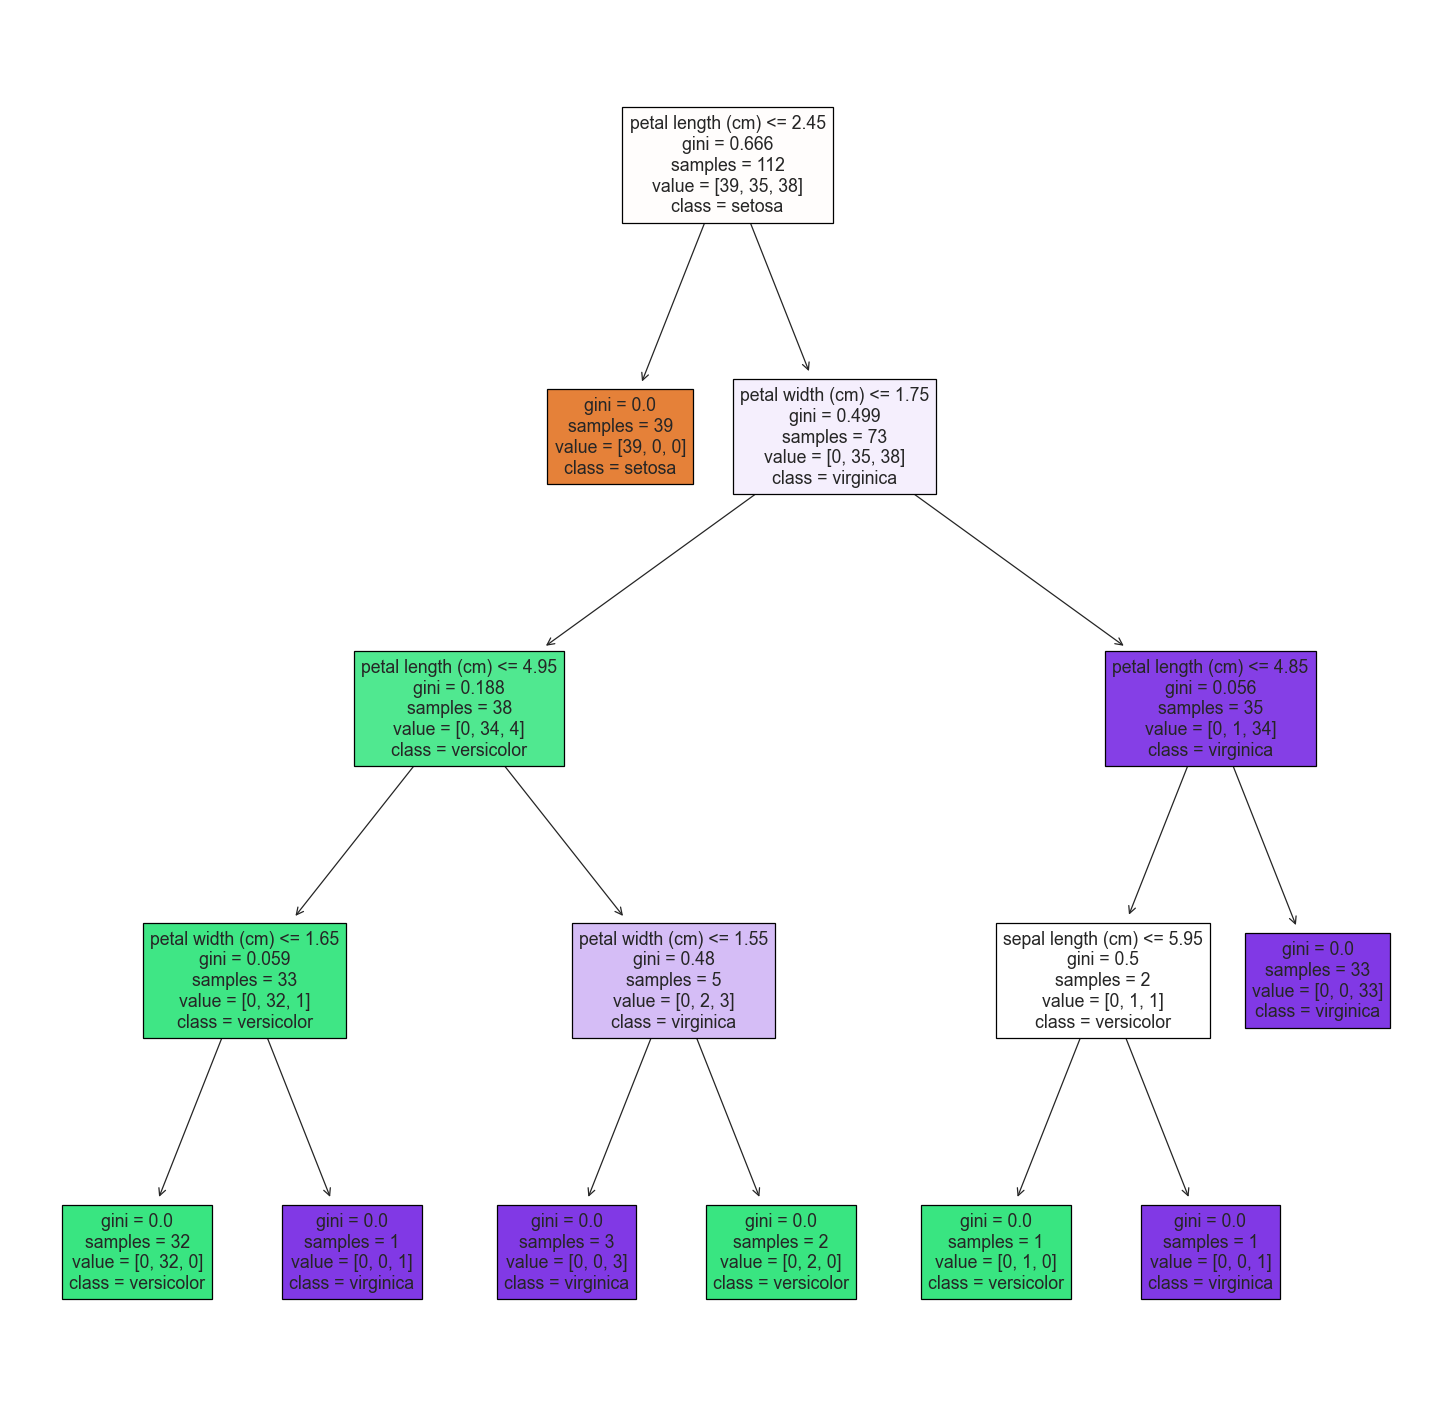

In [249]:
### Visualizing the Decision Tree using plot_tree 

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
_ = tree.plot_tree(DT_model,feature_names=fn,class_names=cn,filled=True)


In [250]:
### Preducutng classes for the Test data

my_preds = DT_model.predict(X_test)

In [251]:
### Viewing the confusion Matrix 

cm = confusion_matrix(y_test, my_preds)
print(cm)

[[11  0  0]
 [ 0 15  0]
 [ 0  1 11]]


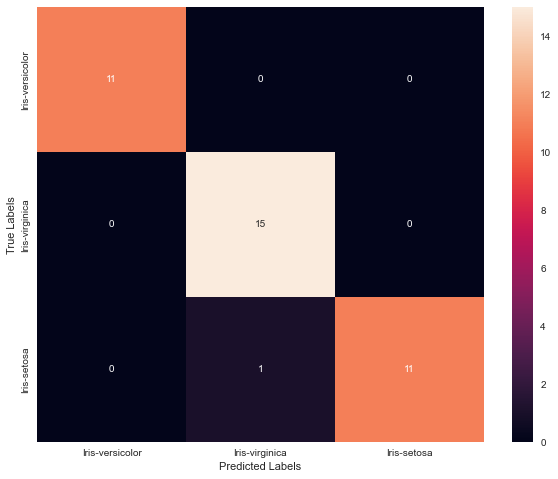

In [252]:
### Visualizing the confusion Matrix using Heat Map

plt.figure(figsize = (10,8))
sns.heatmap(cm, annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [253]:
### Calulating micro and macro metrics as this is multiclass algorithm .

accuracy = accuracy_score(y_test, my_preds)
##class_recall = np.diag(cm) / np.sum(cm, axis = 1)
micro_recall = recall_score(y_test, my_preds,average = 'micro')
macro_recall = recall_score(y_test, my_preds,average = 'macro')
##class_precision = np.diag(cm) / np.sum(cm, axis = 0)
micro_precision = precision_score(y_test, my_preds,average = 'micro')
macro_precision = precision_score(y_test, my_preds,average = 'macro')
micro_f1_score = f1_score(y_test, my_preds,average = 'micro')
macro_f1_score = f1_score(y_test, my_preds,average = 'macro')
print("Accuracy Score       :",accuracy )
##print("Class Wise Recall    :",class_recall)
print("Micro Recall         :",micro_recall)
print("Macro Recall         :",macro_recall)
## print("Class Wise precision :",class_precision)
print("Micro Precision      :",micro_precision)
print("Macro Precision      :",macro_precision)
print("Micro f1_score       :",micro_f1_score)
print("Macro f1_score       :",macro_f1_score)
    

Accuracy Score       : 0.9736842105263158
Micro Recall         : 0.9736842105263158
Macro Recall         : 0.9722222222222222
Micro Precision      : 0.9736842105263158
Macro Precision      : 0.9791666666666666
Micro f1_score       : 0.9736842105263158
Macro f1_score       : 0.9747545582047685


In [254]:
    ### Viewing the Classification Report .   
    
    print(classification_report(y_test, my_preds))
    print("\n")

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38





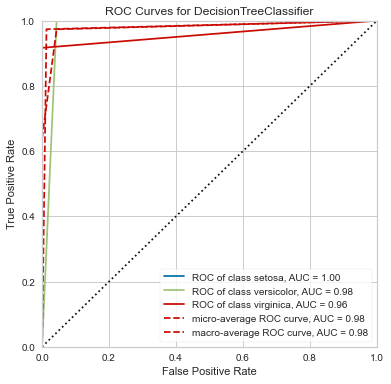

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [255]:
#### Visualizing the ROCAUC curve for the given dataset using Yeollowbrick Visualizer as it makes visualization easy for 
### multiclass classification compared to scikit-learn . 

fig, axes = plt.subplots(figsize = (6,6))
visualizer = ROCAUC(DT_model, classes=['setosa', 'versicolor', 'virginica'])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   